In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
def drawlinegraphA(graph, X, algo="Algo"):
    gridsize = (1, len(X))
    fig = plt.figure(figsize=(16, 4))
    hfont = {'fontname':'Times'}
    for i in range(len(X)):
        ax = plt.subplot2grid(gridsize, (0, i))
        plt.axis('off')
        ax.set_title(algo[i], fontsize = 14, color='green', fontweight='bold', **hfont)
        ax.set_xlim(min(X[i][:,0]), max(X[i][:,0]))
        ax.set_ylim(min(X[i][:,1]), max(X[i][:,1]))
        lines = []
        e = 0
        for j,k in zip(*graph.nonzero()):
            if j>k:
                lines.append([X[i][j], X[i][k]])
            e += 1
        #print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
        lc = mc.LineCollection(lines, linewidths=.3, color="blue")
        ax.add_collection(lc)
        plt.axis('off')

In [3]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [32]:
filename = "datasets/input/3elt_dual.mtx" 
#filename = "datasets/input/grid2_dual.mtx" 
filename = "datasets/input/power.mtx" 
filename = "datasets/input/sf_ba6000.mtx" 
#filename = "datasets/input/Topics_Graph.mtx"
filename = "datasets/input/tube2.mtx"
graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [6]:
G.number_of_edges()

13278

In [7]:
#nx.write_gml(G,"datasets/input/tube2.gml")

In [5]:
from collections import OrderedDict
def readCoordinatesFromGML(graph):
    gfile = open(graph, "r")
    ofile = open(graph+".txt", "w")
    coordinates = OrderedDict()
    for line in gfile.readlines():
        line = line.strip()
        if "id" in line:
            nid = line.split(" ")[1]
        elif "x" in line:
            x = line.split(" ")[1]
        elif "y" in line:
            y = line.split(" ")[1]
            coordinates[nid] = x + "\t" + y
            ofile.write(coordinates[nid]+"\n")
    gfile.close()
    ofile.close()

In [73]:
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_500.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_BH_500.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.openord_500.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_500.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_BH_500.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.openord_500.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_500.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_BH_500.gml")
readCoordinatesFromGML("datasets/output/power.openord_500.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_500.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_BH_500.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.openord_500.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.forceatlas2_1500.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.forceatlas2_BH_1500.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.openord_1500.gml")

In [6]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [7]:
def readCoordinatesOO(filename, flag = False):
    corfile = open(filename)
    if flag:
        wfile = open(filename+".txt", "w")
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[1]), float(l[2])])
        if flag:
            wfile.write(str(float(l[1])) + "\t" + str(float(l[2])) + "\t" + str(int(l[0])) + "\n")
    X = np.array(X)
    corfile.close()
    if flag:
        wfile.close
    return X

In [106]:
readCoordinatesOO("datasets/output/3elt_dual.icoord", True)
readCoordinatesOO("datasets/output/grid2_dual.icoord", True)
readCoordinatesOO("datasets/output/power.icoord", True)
readCoordinatesOO("datasets/output/sf_ba6000.icoord", True)
readCoordinatesOO("datasets/output/Topics_Graph.icoord", True)

array([[  33.3745 ,   -1.85834],
       [  47.6877 ,  -20.7848 ],
       [   3.53468,   -4.76039],
       ...,
       [  65.0663 ,  -13.0377 ],
       [  71.6774 ,   10.7017 ],
       [-301.045  ,  -65.1693 ]])

In [12]:
algoBH3elt_dual = readCoordinates("datasets/output/3elt_dual.mtxBHMINB256PARAOUT500.txt")
algo23elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB256PARAOUT500.txt")
openord3elt_dual = readCoordinates("datasets/output/3elt_dual.openord_500.gml.txt")
openordGH3elt_dual = readCoordinates("datasets/output/3elt_dual.icoord.txt")
forceatlas23elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_500.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_BH_500.gml.txt")
tsNET3elt_dual = readCoordinates("datasets/output/3elt_dualtnset.txt")

In [16]:
algoBHpower = readCoordinates("datasets/output/power.mtxBHMINB256PARAOUT500.txt")
algo2power = readCoordinates("datasets/output/power.mtxCACHEMINB256PARAOUT500.txt")
openordpower = readCoordinates("datasets/output/power.openord_500.gml.txt")
openordGHpower = readCoordinatesOO("datasets/output/power.icoord")
forceatlas2power = readCoordinates("datasets/output/power.forceatlas2_500.gml.txt")
forceatlas2bhpower = readCoordinates("datasets/output/power.forceatlas2_BH_500.gml.txt")
tsNETpower = readCoordinates("datasets/output/powertnset.txt")

In [18]:
algoBHsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxBHMINB256PARAOUT500.txt")
algo2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB256PARAOUT500.txt")
openordsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.openord_500.gml.txt")
openordGHsf_ba6000 = readCoordinatesOO("datasets/output/sf_ba6000.icoord")
forceatlas2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_500.gml.txt")
forceatlas2bhsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_BH_500.gml.txt")
tsNETsf_ba6000 = readCoordinates("datasets/output/sfba6000tnset.txt")

In [18]:
algoBHTopics_Graph = readCoordinates("datasets/output/Topics_Graph.mtxCACHEMINB256PARAOUT1500.txt")
algo2Topics_Graph = readCoordinates("datasets/output/Topics_Graph.mtxCACHEMINB256PARAOUT1500.txt")
openordTopics_Graph = readCoordinates("datasets/output/Topics_Graph.openord_1500.gml.txt")
openordGHTopics_Graph = readCoordinatesOO("datasets/output/Topics_Graph.icoord")
forceatlas2Topics_Graph = readCoordinates("datasets/output/Topics_Graph.forceatlas2_1500.gml.txt")
forceatlas2bhTopics_Graph = readCoordinates("datasets/output/Topics_Graph.forceatlas2_BH_1500.gml.txt")
tsNETTopics_Graph = readCoordinates("datasets/output/topicslr900.txt")

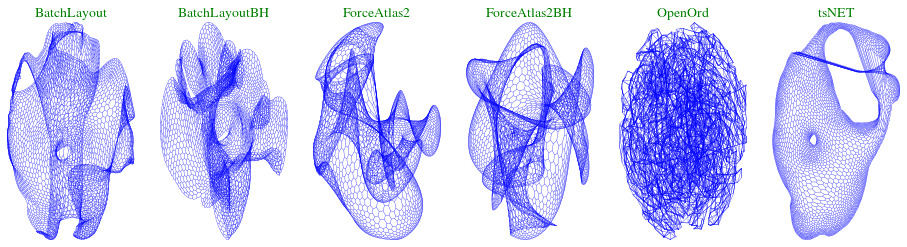

In [23]:
drawlinegraphA(graph, [algo23elt_dual, algoBH3elt_dual, forceatlas23elt_dual, forceatlas2bh3elt_dual, openord3elt_dual,
                  tsNET3elt_dual], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", "ForceAtlas2BH", "OpenOrd", "tsNET"])

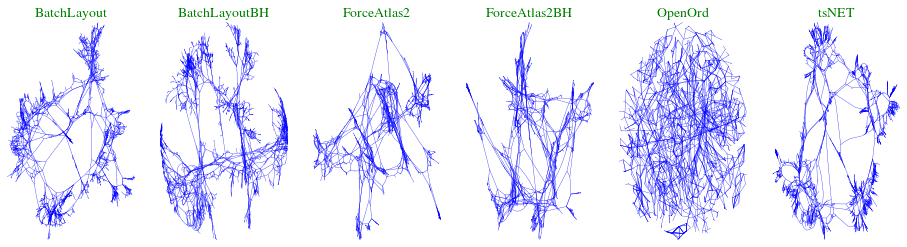

In [25]:
drawlinegraphA(graph, [algo2power, algoBHpower,forceatlas2power, forceatlas2bhpower, openordpower,
                  tsNETpower], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", "ForceAtlas2BH", "OpenOrd", "tsNET"])

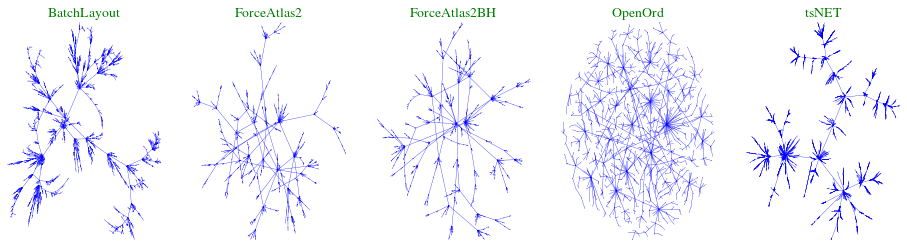

In [31]:
drawlinegraphA(graph, [algo2sf_ba6000, forceatlas2sf_ba6000, forceatlas2bhsf_ba6000, openordsf_ba6000, tsNETsf_ba6000],
                       ["BatchLayout" , "ForceAtlas2", "ForceAtlas2BH", "OpenOrd", "tsNET"])

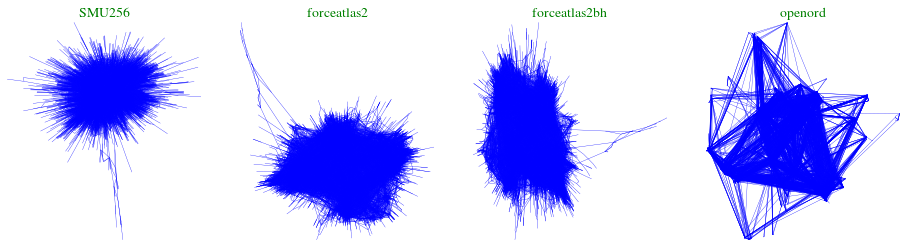

In [28]:
drawlinegraphA(graph, [algo2Topics_Graph, forceatlas2Topics_Graph, forceatlas2bhTopics_Graph, openordTopics_Graph], 
               ["BatchLayout", "ForceAtlas2", "ForceAtlas2BH", "OpenOrd"])

In [37]:
readCoordinatesFromGML("datasets/output/tube2.forceatlas2_300.gml")
readCoordinatesFromGML("datasets/output/tube2.forceatlas2_BH_300.gml")
readCoordinatesFromGML("datasets/output/tube2.openord_300.gml")

In [34]:
algo1BHtube2 = readCoordinates("datasets/output/tube2.mtxBHMINB256PARAOUT300.txt")
algo2tube2 = readCoordinates("datasets/output/tube2.mtxCACHEMINB256PARAOUT300.txt")
openorGHdtube2 = readCoordinatesOO("datasets/output/tube2.icoord")
openordtube2 = readCoordinates("datasets/output/tube2.openord_300.gml.txt")
forceatlas2tube2 = readCoordinates("datasets/output/tube2.forceatlas2_300.gml.txt")
forceatlas2bhtube2 = readCoordinates("datasets/output/tube2.forceatlas2_BH_300.gml.txt")
tsNETtube2 = readCoordinates("datasets/output/tube2.tsNET_300.txt")

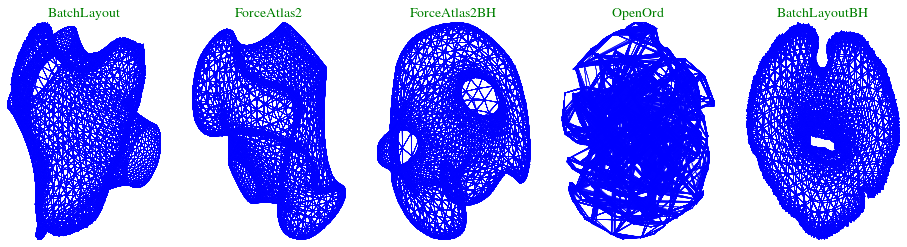

In [35]:
drawlinegraphA(graph, [algo2tube2, forceatlas2tube2, forceatlas2bhtube2, openordtube2,
                  algo1BHtube2], ["BatchLayout", "ForceAtlas2", "ForceAtlas2BH", "OpenOrd", "BatchLayoutBH"])

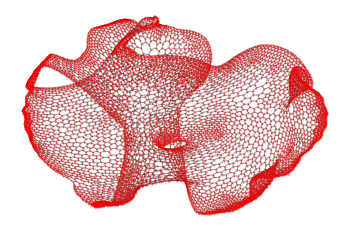

In [93]:
drawnetworkxgraph(G, algo13elt_dual, 1.2, 0.4)

In [33]:
def convertToGraphML(G, pos, filename):
    if len(G) > 0:
        pos = dict(enumerate(pos))
        for node, val in pos.items():
            x = val[0]
            y = val[1]
            G.node[node]['x'] = float(x)
            G.node[node]['y'] = float(y)
    nx.write_graphml(G, filename)

In [94]:
#For future usages
#coordinates = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")
#outputgmlfile = "datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml"
#convertToGraphML(G, coordinates, outputgmlfile)
#After this run following perl command
#perl -pe 's/d0/x/g;s/d1/y/g;' power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml > power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml.SMU.graphml
#command = "perl -pe 's/d0/x/g;s/d1/y/g;' " + outputgmlfile +" > "+ outputgmlfile + ".SMU.graphml"
#os.system(command)
#os.system("rm " + outputgmlfile)

In [4]:
GT = nx.Graph()

In [11]:
import pygraphviz as pgv
#g = pgv.AGraph("datasets/input/smaller_network_v3.dot")
g = pgv.AGraph("datasets/input/Topics_Graph.dot")

In [12]:
for i in g:
    #print(i,g[i])
    GT.add_node(i)
    for j in g[i]:
        #print(i,j)
        GT.add_edge(i,j)
print(len(GT.nodes),len(GT.edges))
print(GT.number_of_nodes(), GT.number_of_edges())

5947 26695
5947 26695


In [13]:
#nx.write_gml(GT,"datasets/input/googletopic.gml")

In [14]:
googletopic = open("datasets/input/Topics_Graph.mtx","w")
googletopic.write(str(len(GT.nodes))+" "+str(len(GT.nodes))+" "+ str(len(GT.edges)) + "\n")
for i,j in GT.edges:
    googletopic.write(str(int(j))+ " "+str(int(i)) + "\n")
googletopic.close()

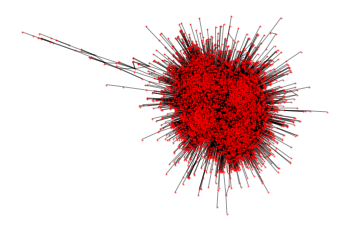

In [44]:
drawnetworkxgraph(G,algo2googletopic, 1.2, 0.4)